## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns # Import Seaborn

# Load the data using Pandas

In [2]:
# import data from the GSS
# Define file path
file_path = "/content/GSS.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

In [3]:
print(df.head())

   year  id_               hrs2        marital childs age     sex  \
0  1990    1  .i:  Inapplicable  Never married      0  65  FEMALE   
1  1990    2  .i:  Inapplicable  Never married      0  42    MALE   
2  1990    3  .i:  Inapplicable  Never married      0  25    MALE   
3  1990    4  .i:  Inapplicable  Never married      0  39  FEMALE   
4  1990    5  .i:  Inapplicable  Never married      6  55    MALE   

          happy             hapmar               life    ballot  
0  Pretty happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  
1    Very happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  
2  Pretty happy  .i:  Inapplicable           Exciting  Ballot a  
3  Pretty happy  .i:  Inapplicable           Exciting  Ballot a  
4  Pretty happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  


In [4]:
# see information about df, ensure that all variables I want are there
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables

(47497, 11) 

year        int64
id_         int64
hrs2       object
marital    object
childs     object
age        object
sex        object
happy      object
hapmar     object
life       object
ballot     object
dtype: object 



# Clean the data

Most of the variables have various different labels on data inputs that are along the lines of "Don't Know" or "Skipped", and for those I would like to put all of those towgtehr into one sort of "No Answer" catgeory unless the idfferentiation between the reasons there is no answer is actually important. Another main strategy I want to use to clean the data is to coerce the numeric variables that are currently obejct types to actually be numeric so that I can make meaningful summaries and visualizations with them.

## Clean gender variable

In [18]:
print(df['sex'].unique(),'\n')

['FEMALE' 'MALE' '.n:  No answer' '.i:  Inapplicable'
 '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose'] 



In [19]:
df["sex"] = df["sex"].replace(['.n:  No answer', '.i:  Inapplicable',
                               '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [20]:
print(df['sex'].unique(),'\n')

['FEMALE' 'MALE' 'No Answer'] 



## Clean age variable

In [15]:
# coerce age variable to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [16]:
# need to account for age 89 or older
df['age'] = df['age'].replace('89 or older', '89')

In [17]:
print('Age variable summary: \n', df['age'].describe(),'\n')

Age variable summary: 
 count    46520.000000
mean        47.192691
std         17.199202
min         18.000000
25%         33.000000
50%         45.000000
75%         60.000000
max         88.000000
Name: age, dtype: float64 



## Clean child variable

In [7]:
print(df['childs'].unique(),'\n') # list of unique values
print(df['childs'].value_counts(), '\n') # number of times each unique value occurs

['0' '6' '2' '3' '5' '1' '4' '.d:  Do not Know/Cannot Choose' '8 or more'
 '7' '.n:  No answer' '.s:  Skipped on Web' '.i:  Inapplicable'] 

childs
0                                 13350
2                                 12401
1                                  7596
3                                  7393
4                                  3586
5                                  1458
6                                   721
8 or more                           444
7                                   375
.d:  Do not Know/Cannot Choose      113
.n:  No answer                       33
.i:  Inapplicable                    16
.s:  Skipped on Web                  11
Name: count, dtype: int64 



In [8]:
# need to account for number of children 8 or more, changing to 8 so still retained when coerce
df['childs'] = df['childs'].replace('8 or more', '8')

In [9]:
# coerce number of children to numeric
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')

In [10]:
print(df['childs'].unique(),'\n') # list of unique values

[ 0.  6.  2.  3.  5.  1.  4. nan  8.  7.] 



In [11]:
print('# of Children variable summary: \n', df['childs'].describe(),'\n')

# of Children variable summary: 
 count    47324.000000
mean         1.832347
std          1.666458
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: childs, dtype: float64 



## Clean number hours work per week variable

In [12]:
# number of hours usually work a week should also be numeric, need to account for non-numeric answers
df['hrs2'] = df['hrs2'].replace('89+ hrs', '89')

In [13]:
# coerce number of children to numeric
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce')

In [14]:
print('Usual # of hours/week worked variable summary: \n', df['hrs2'].describe(),'\n')

Usual # of hours/week worked variable summary: 
 count    919.000000
mean      38.648531
std       13.484982
min        0.000000
25%       35.000000
50%       40.000000
75%       45.000000
max       89.000000
Name: hrs2, dtype: float64 



## Clean general happiness variable

In [ ]:
# clean general happiness, want to put all "No answer" type of answers as one category
df["happy"] = df["happy"].replace(['.n:  No answer', '.i:  Inapplicable',
                               '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [ ]:
print(df['happy'].unique(),'\n')

## Clean marital happiness variable

In [ ]:
# clean marital happiness, want to put the "Don't Know" and "Skipped" into one catgeory
# and have Inapplicable still be its own catgeory (bc that would mean those ppl aren't married and that is still important)
df['marital'] = df['marital'].replace(['.n:  No answer', '.s:  Skipped on Web',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [ ]:
df['hapmar'] = df['hapmar'].replace('.i:  Inapplicable', 'Inapplicable')

In [ ]:
print(df['hapmar'].unique(),'\n')

## Clean marital status variable

In [21]:
# clean marital status - make one category for all "No answer" answers
print(df['marital'].unique(),'\n')

['Never married' 'Widowed' 'Divorced' 'Married' 'Separated'
 '.n:  No answer' '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose'] 



In [22]:
df['marital'] = df['marital'].replace(['.n:  No answer', '.s:  Skipped on Web',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [23]:
print(df['marital'].unique(),'\n')

['Never married' 'Widowed' 'Divorced' 'Married' 'Separated' 'No Answer'] 



## Clean exciting/dull life variable

In [24]:
print(df['life'].unique(),'\n')

['.i:  Inapplicable' 'Exciting' 'Routine' '.d:  Do not Know/Cannot Choose'
 'Dull' '.n:  No answer' '.s:  Skipped on Web'] 



In [25]:
df['life'] = df['life'].replace(['.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [26]:
print(df['life'].unique(),'\n')

['.i:  Inapplicable' 'Exciting' 'Routine' 'No Answer' 'Dull'] 



# Numeric Summaries and Visualizations

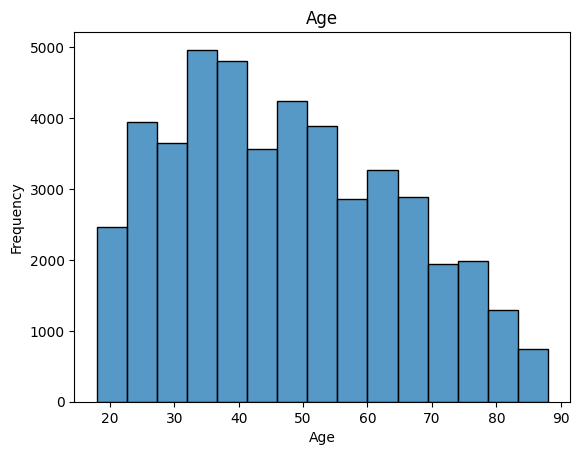

In [29]:
# explore distribution of age variable
var = 'age'
sns.histplot(df[var], bins=15)

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

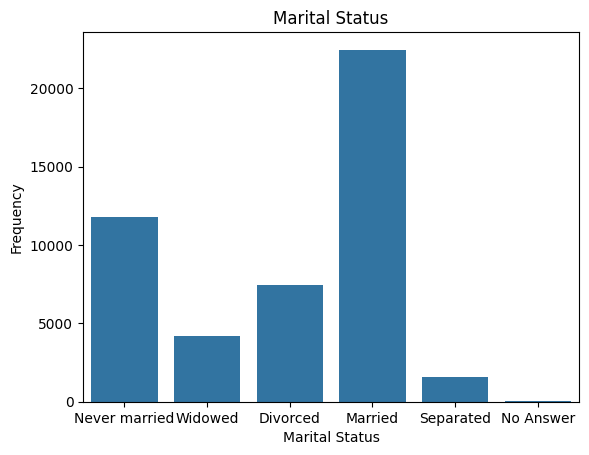

In [30]:
# explore marital status
var = 'marital'
sns.countplot(x=var, data=df)

plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

plt.show()

In [ ]:
# visualization: scatterplot showing general happiness by age, sex, and race

In [ ]:
# visualization: scatterplot showing marital happiness with number of children, hrs usually work, and sex

In [ ]:
# visualization: life exciting or dull with age, sex

In [ ]:
# visualiaztion: want to see distribution of happiness at different ages

In [ ]:
# visalization: over the years, have people gotten happier in general?